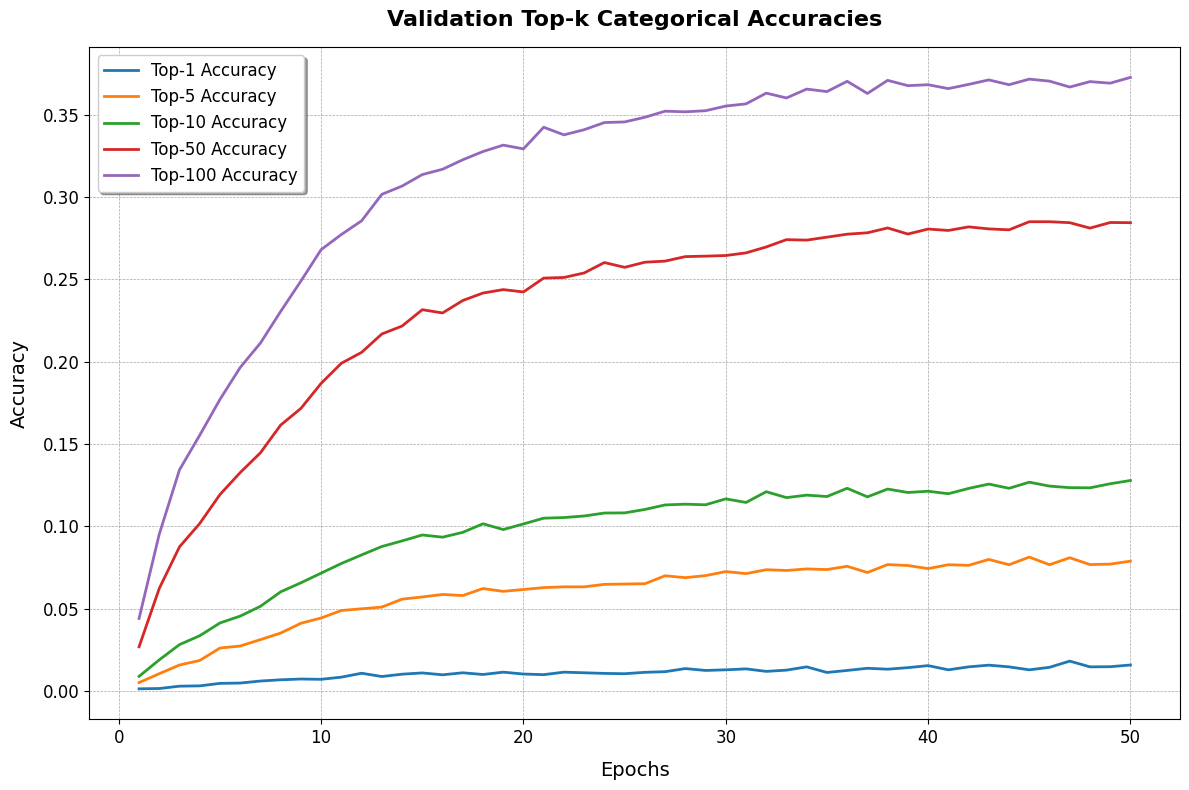

In [1]:
import json
import matplotlib.pyplot as plt

# Load the training history
with open('history/training_history_0.8_all_candidates.json', 'r') as file:
    history = json.load(file)

# Extract metrics
epochs = range(1, len(history['loss']) + 1)
loss = history['loss']
val_loss = history['val_loss']
top_1_acc = history['val_factorized_top_k/top_1_categorical_accuracy']
top_5_acc = history['val_factorized_top_k/top_5_categorical_accuracy']
top_10_acc = history['val_factorized_top_k/top_10_categorical_accuracy']
top_50_acc = history['val_factorized_top_k/top_50_categorical_accuracy']
top_100_acc = history['val_factorized_top_k/top_100_categorical_accuracy']

# Define a color palette for a clean, professional look
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, top_1_acc, label='Top-1 Accuracy', color=colors[0], linewidth=2)
plt.plot(epochs, top_5_acc, label='Top-5 Accuracy', color=colors[1], linewidth=2)
plt.plot(epochs, top_10_acc, label='Top-10 Accuracy', color=colors[2], linewidth=2)
plt.plot(epochs, top_50_acc, label='Top-50 Accuracy', color=colors[3], linewidth=2)
plt.plot(epochs, top_100_acc, label='Top-100 Accuracy', color=colors[4], linewidth=2)

# Title and labels
plt.title('Validation Top-k Categorical Accuracies', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)

# Add a legend with a clean style
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks for better presentation
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tighten layout for better spacing
plt.tight_layout()
plt.savefig('retriever_training_evaluation_metrics.png', bbox_inches='tight')
# Show the plot
plt.show()

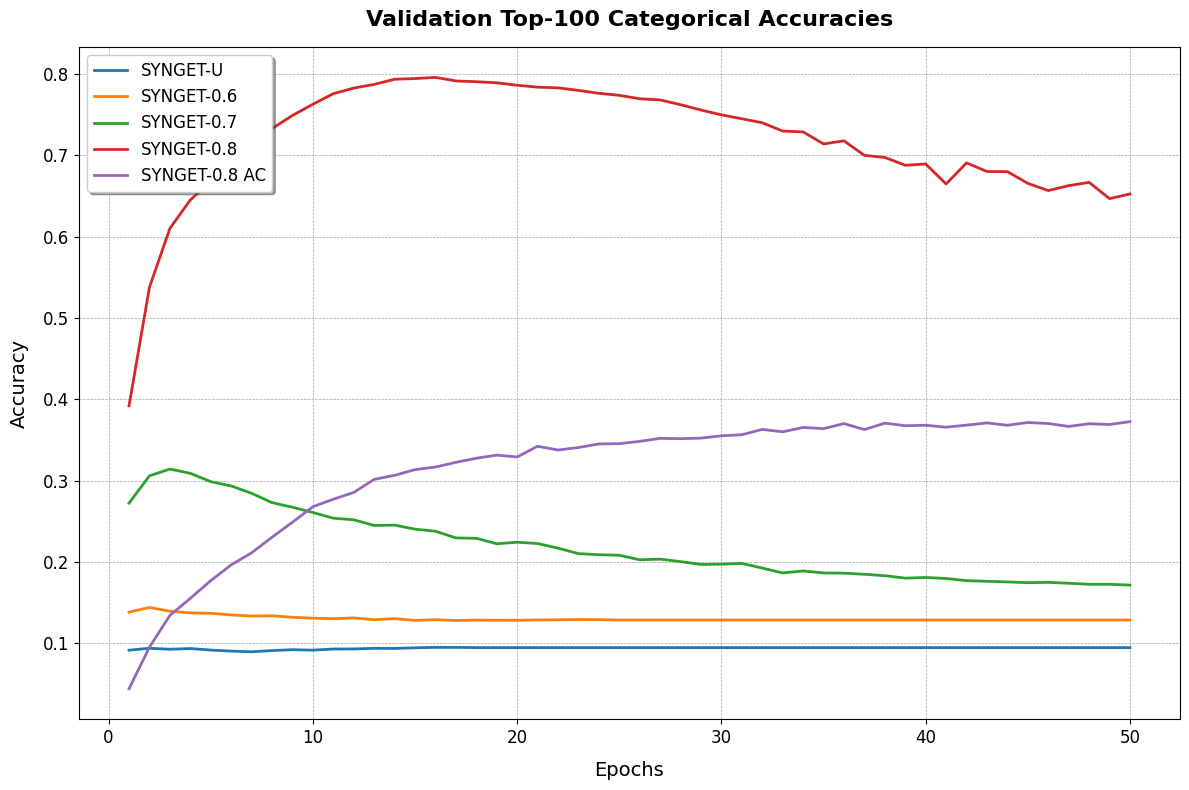

In [2]:
# Load the training history
with open('history/training_history_u.json', 'r') as file:
    history_u = json.load(file)
    
with open('history/training_history_6.0.json', 'r') as file:
    history_06 = json.load(file)
    
with open('history/training_history_7.0.json', 'r') as file:
    history_07 = json.load(file)
    
with open('history/training_history_8.0.json', 'r') as file:
    history_08 = json.load(file)
    
with open('history/training_history_0.8_all_candidates.json', 'r') as file:
    history_08_ac = json.load(file)
    

# Extract metrics
epochs = range(1, len(history_u['loss']) + 1)
synget_u = history_u['val_factorized_top_k/top_100_categorical_accuracy']
synget_06 = history_06['val_factorized_top_k/top_100_categorical_accuracy']
synget_07 = history_07['val_factorized_top_k/top_100_categorical_accuracy']
synget_08 = history_08['val_factorized_top_k/top_100_categorical_accuracy']
synget_08_ac = history_08_ac['val_factorized_top_k/top_100_categorical_accuracy']

# Define a color palette for a clean, professional look
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, synget_u, label='SYNGET-U', color=colors[0], linewidth=2)
plt.plot(epochs, synget_06, label='SYNGET-0.6', color=colors[1], linewidth=2)
plt.plot(epochs, synget_07, label='SYNGET-0.7', color=colors[2], linewidth=2)
plt.plot(epochs, synget_08, label='SYNGET-0.8', color=colors[3], linewidth=2)
plt.plot(epochs, synget_08_ac, label='SYNGET-0.8 AC', color=colors[4], linewidth=2)

# Title and labels
plt.title('Validation Top-100 Categorical Accuracies', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)

# Add a legend with a clean style
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks for better presentation
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tighten layout for better spacing
plt.tight_layout()
plt.savefig('synget_evaluation_metrics.png', bbox_inches='tight')
# Show the plot
plt.show()

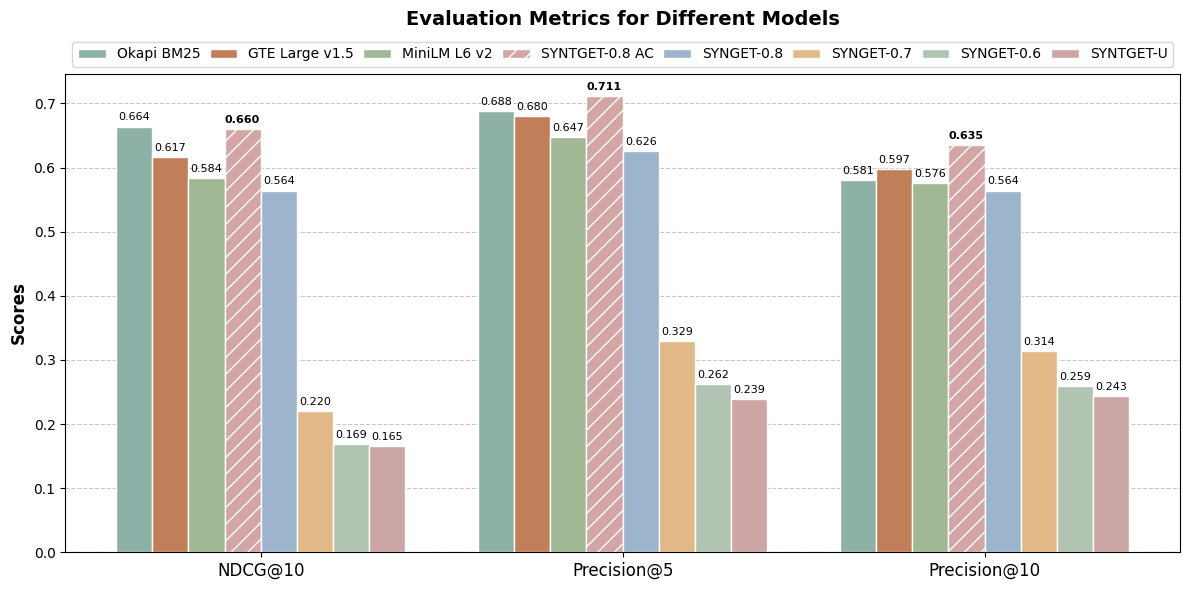

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = [
    'Okapi BM25', 
    'GTE Large v1.5', 
    'MiniLM L6 v2', 
    'SYNTGET-0.8 AC', 
    'SYNGET-0.8', 
    'SYNGET-0.7', 
    'SYNGET-0.6', 
    'SYNTGET-U'
]

ndcg10 = [0.664, 0.617, 0.584, 0.660, 0.564, 0.220, 0.169, 0.165]
prec5   = [0.688, 0.680, 0.647, 0.711, 0.626, 0.329, 0.262, 0.239]
prec10  = [0.581, 0.597, 0.576, 0.635, 0.564, 0.314, 0.259, 0.243]

# Metrics on the x-axis
metrics = ['NDCG@10', 'Precision@5', 'Precision@10']
x = np.arange(len(metrics))

n_models = len(models)
total_width = 0.8  # Set total width for bar groups
bar_width = total_width / n_models

# Define custom colors similar to the reference image
colors = ["#8db0a7", "#c17f59", "#a1b894", "#d4a5a5",
          "#9cb4cc", "#e2b886", "#b0c4b1", "#cca5a5"]
hatch_pattern = '//'  # Striped pattern for highlighting

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - (n_models - 1) / 2) * bar_width
    values = [ndcg10[i], prec5[i], prec10[i]]
    bars = ax.bar(x + offset, values, bar_width, label=model, color=colors[i % len(colors)],edgecolor='white',
                   hatch=hatch_pattern if i == 3 else '')  # Apply hatching to the first model
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8, fontweight='bold' if i == 3 else 'normal')

ax.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax.set_title('Evaluation Metrics for Different Models', fontsize=14, fontweight='bold', pad=35)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(loc='center', mode='expand', ncols=8, bbox_to_anchor=(0., 1.00, 1.00, .080))
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig("styled_evaluation_metrics_chart.png", dpi=300)
plt.show()
